<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/03_sel_caract_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import sklearn
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import r_regression
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import SelectKBest, chi2, RFE
# from sklearn.linear_model import LogisticRegression

In [ ]:
# Crgar dataset desde mi google drive
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018_procesado.csv"
data = pd.read_csv(url)
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5


In [ ]:
data.dtypes

Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code         int64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Order Year          int64
Order Month         int64
Order Day           int64
Ship Day            int64
Ship Month          int64
Ship Year           int64
Delivery Time       int64
dtype: object

In [ ]:
# Aplica Anova de valor F para linealidad entre variables de entrada y salida

# Seleccionar variables de entrada y salida
X = data[data.select_dtypes(include=['int64', 'float64']).columns].drop('Sales', axis=1)
y = data['Sales']

# Aplicar ANOVA de valor F para linealidad
selector = SelectKBest(f_regression, k=3)
selector.fit(X, y)

# Obtener las variables seleccionadas
selected_features = X.columns[selector.get_support()]

# Imprimir las variables seleccionadas
print(f"Variables seleccionadas: {selected_features}")

Variables seleccionadas: Index(['Quantity', 'Profit', 'Shipping Cost'], dtype='object')


In [ ]:
# Calcular los valores F y los valores p
F_values, p_values = f_regression(X, y)

# Imprimir los valores F y los valores p
print("F-values:", F_values)
print("p-values:", p_values)

F-values: [2.35031192e+01 5.59316149e+03 3.88643614e+02 1.57678977e+04
 7.36736961e+04 4.32773890e-01 1.75801196e-01 1.41473266e-01
 2.26956457e-01 4.46708803e-01 5.23873347e-01 1.07093749e+00]
p-values: [1.25075759e-06 0.00000000e+00 3.41151400e-86 0.00000000e+00
 0.00000000e+00 5.10633925e-01 6.75008494e-01 7.06822313e-01
 6.33791841e-01 5.03905057e-01 4.69197384e-01 3.00738664e-01]


In [ ]:
# prompt: inicia lstas vacias "past_test" y "not_pass_test" y un alpla de 0.05, itera sobre los valores crea una secuencia de numeros desde el 0 hasta el numero de caracteristicas menos 1, dentro del bucle imprime los nombres de las caracteristicas x-columns(i) y su valor p correspondiente f_value[1][i], si el valor p de de una caracteristica es menor que alpha se agrega a pass_test y si no a notpasstest

past_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(X.columns)):
  print(f"Característica: {X.columns[i]}, p-valor: {p_values[i]}")
  if p_values[i] < alpha:
    past_test.append(X.columns[i])
  else:
    not_pass_test.append(X.columns[i])
print("Caracteristicas pasadas:", past_test)
print("Caracteristicas no pasadas:", not_pass_test)

Característica: Postal Code, p-valor: 1.2507575908136578e-06
Característica: Quantity, p-valor: 0.0
Característica: Discount, p-valor: 3.411513996828431e-86
Característica: Profit, p-valor: 0.0
Característica: Shipping Cost, p-valor: 0.0
Característica: Order Year, p-valor: 0.5106339246214627
Característica: Order Month, p-valor: 0.6750084943740959
Característica: Order Day, p-valor: 0.7068223133889494
Característica: Ship Day, p-valor: 0.6337918405120424
Característica: Ship Month, p-valor: 0.5039050572035039
Característica: Ship Year, p-valor: 0.46919738429564983
Característica: Delivery Time, p-valor: 0.30073866448674846
Caracteristicas pasadas: ['Postal Code', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
Caracteristicas no pasadas: ['Order Year', 'Order Month', 'Order Day', 'Ship Day', 'Ship Month', 'Ship Year', 'Delivery Time']


In [ ]:
# Calcular los valores F y los valores p
F_values, p_values = f_regression(X, y)

# Imprimir los valores F y los valores p
print("F-values:", F_values)
print("p-values:", p_values)

plt.figure(figsize=(10, 6))
# Create DataFrame outside of plt.bar() and handle potential KeyError
f_values_df = pd.DataFrame

F-values: [2.35031192e+01 5.59316149e+03 3.88643614e+02 1.57678977e+04
 7.36736961e+04 4.32773890e-01 1.75801196e-01 1.41473266e-01
 2.26956457e-01 4.46708803e-01 5.23873347e-01 1.07093749e+00]
p-values: [1.25075759e-06 0.00000000e+00 3.41151400e-86 0.00000000e+00
 0.00000000e+00 5.10633925e-01 6.75008494e-01 7.06822313e-01
 6.33791841e-01 5.03905057e-01 4.69197384e-01 3.00738664e-01]


<Figure size 1000x600 with 0 Axes>

F-values: [2.35031192e+01 5.59316149e+03 3.88643614e+02 1.57678977e+04
 7.36736961e+04 4.32773890e-01 1.75801196e-01 1.41473266e-01
 2.26956457e-01 4.46708803e-01 5.23873347e-01 1.07093749e+00]
p-values: [1.25075759e-06 0.00000000e+00 3.41151400e-86 0.00000000e+00
 0.00000000e+00 5.10633925e-01 6.75008494e-01 7.06822313e-01
 6.33791841e-01 5.03905057e-01 4.69197384e-01 3.00738664e-01]


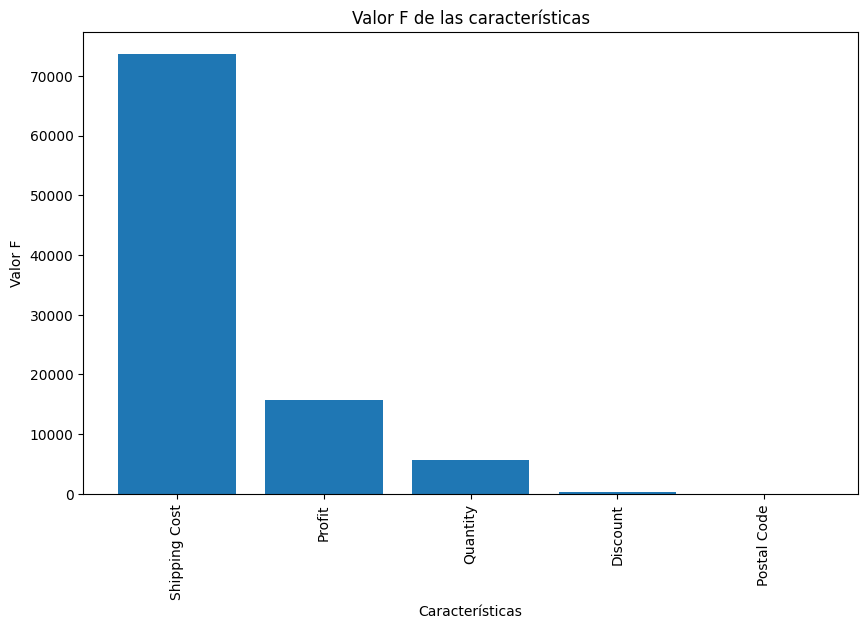

In [ ]:
# Calcular los valores F y los valores p
F_values, p_values = f_regression(X, y)

# Imprimir los valores F y los valores p
print("F-values:", F_values)
print("p-values:", p_values)

plt.figure(figsize=(10, 6))
# Crear un DataFrame fuera de plt.bar() y manejar posibles errores de KeyError
f_values_df = pd.DataFrame({'F_values': F_values}, index=X.columns)
f_values_df = f_values_df.sort_values('F_values', ascending=False)  # Ordenar los valores de F de mayor a menor
try:
    f_values_to_plot = f_values_df.drop(not_pass_test)
except KeyError:
    print("Algunas columnas en 'not_pass_test' no se encontraron en el DataFrame.")
    f_values_to_plot = f_values_df  # Graficar todos los valores si ocurre un KeyError

plt.bar(f_values_to_plot.index, f_values_to_plot['F_values'])
plt.xlabel('Características')
plt.ylabel('Valor F')
plt.title('Valor F de las características')
plt.xticks(rotation=90)
plt.show()

In [ ]:
r_value = r_regression(X, y)
r_value

array([-0.02140205,  0.31357718, -0.08672187,  0.48491811,  0.76783477,
       -0.00290483,  0.00185141,  0.00166084,  0.0021036 ,  0.00295123,
       -0.00319597, -0.00456951])

In [ ]:
# Aplicar el método de filtro SelectKBest con el estadístico de información mutua
selector = SelectKBest(mutual_info_regression, k=3)
selector.fit(X, y)

# Obtener las variables seleccionadas
selected_features = X.columns[selector.get_support()]

# Imprimir las variables seleccionadas
print(f"Variables seleccionadas: {selected_features}")


Variables seleccionadas: Index(['Quantity', 'Profit', 'Shipping Cost'], dtype='object')


[[ 4.59399705e-02  2.22676786e-02  7.26247320e-03  9.59172626e-04
   1.27187024e-02 -6.61422119e-01  2.35762965e-01 -8.72596725e-03
   2.12860193e-02  2.53516249e-01 -6.62807355e-01 -1.23727812e-03]
 [-4.99342983e-02 -4.09393748e-02  1.30625591e-02 -2.14090167e-02
  -2.76911676e-02 -2.48391967e-01 -6.63169002e-01 -5.96103439e-03
  -3.74897647e-02 -6.56655444e-01 -2.45566277e-01  1.69601653e-03]
 [-2.50806453e-02  3.63941780e-01 -3.92033306e-01  5.96144069e-01
   5.81920569e-01 -3.39181948e-03 -3.55635046e-02  1.84773079e-03
  -1.14379842e-02 -3.35493506e-02 -4.02600978e-03 -1.29056783e-01]
 [ 1.79201127e-03  3.00170662e-03  2.67985753e-03  2.88834151e-03
   7.04720007e-03 -1.67266284e-03 -2.27499176e-02  7.07866076e-01
   7.05523271e-01 -2.31624938e-02 -1.55944777e-03  5.08282967e-03]
 [ 3.86502200e-01  4.91708873e-01  5.71656738e-01 -2.68478323e-01
   2.87176727e-01  1.63073949e-02 -3.15578114e-02  3.98994937e-04
  -6.88212743e-03 -3.25322078e-02  1.51859610e-02 -3.53408571e-01]
 [ 5.

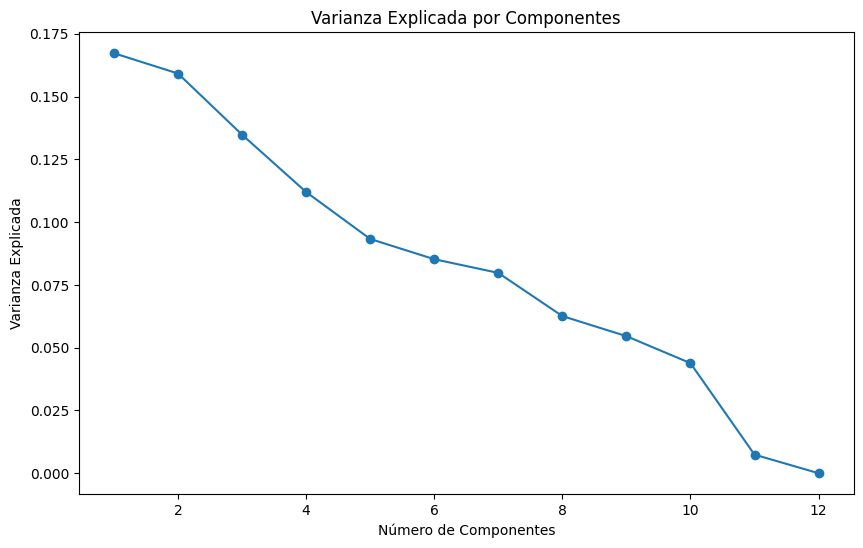

In [ ]:
# Aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Muestra los componentes principales del PCA como columnas
print(pca.components_)

# Calcular la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')

plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes')
plt.show()

In [ ]:
# Separar la variable objetivo y las variables predictoras
X = data.drop('Sales', axis=1).select_dtypes(include=['int64', 'float64'])
y = data['Sales']

# Asegurarse de que todas las variables en X sean no negativas
X = X.abs()  # Tomar el valor absoluto de todas las variables en X

# Use f_regression for continuous target variables
test = SelectKBest(score_func=f_regression, k=4)  # Change score_func to f_regression
fit = test.fit(X, y)

# Obtener los índices ordenados de las características más importantes a las menos importantes
indices = np.argsort(fit.scores_)[::-1]

features = []
for i in range(4):
    features.append(X.columns[indices[i]])

# Imprimir el ranking de características
print("Características seleccionadas: ", features)

Características seleccionadas:  ['Shipping Cost', 'Profit', 'Quantity', 'Discount']


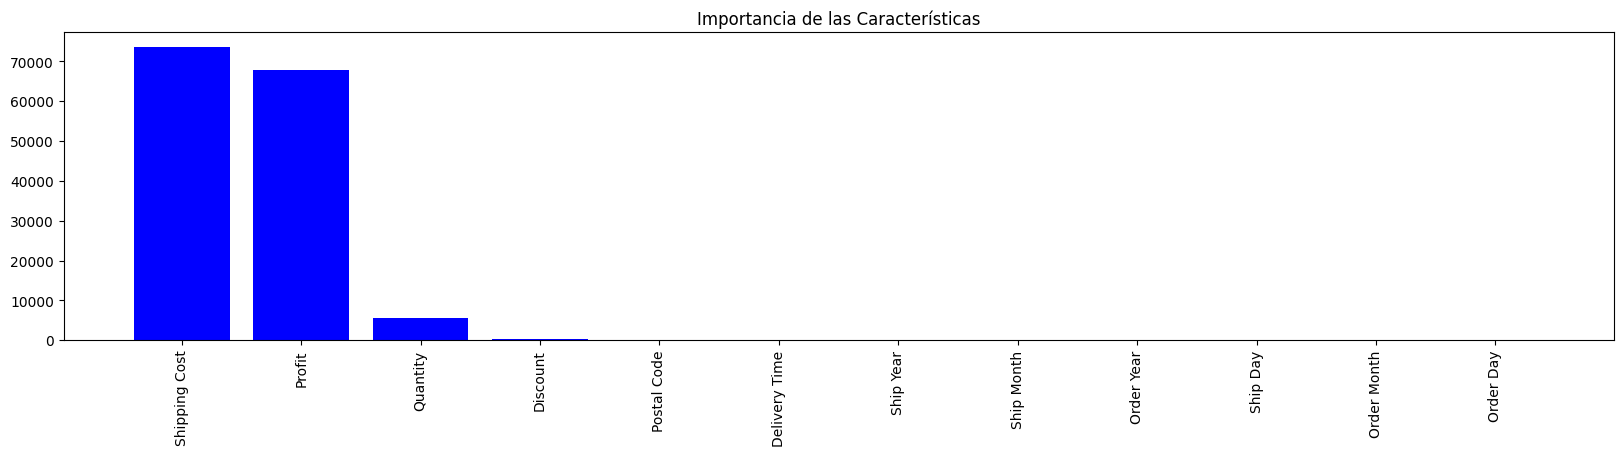

In [ ]:
# Plot the scores
plt.figure(figsize=(20, 4))
plt.bar(X.columns[indices], fit.scores_[indices], color='b', align='center')
plt.xticks(rotation=90)
plt.title('Importancia de las Características')
plt.show()

In [ ]:
# Separar la variable objetivo y las variables predictoras
X = data.drop('Sales', axis=1).select_dtypes(include=['int64', 'float64'])
y = data['Sales']

# Asegurarse de que todas las variables en X sean no negativas
X = X.abs()  # Tomar el valor absoluto de todas las variables en X

# Use a regression model for continuous target variables, for example LinearRegression
from sklearn.linear_model import LinearRegression # Import LinearRegression
model = LinearRegression() # Use LinearRegression instead of LogisticRegression
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)
print("Número de características: ", fit.n_features_)
print("Características seleccionadas: ", fit.support_)
print("Ranking de características: ", fit.ranking_)
print("Características seleccionadas: ", X.columns[fit.support_])

Número de características:  3
Características seleccionadas:  [False  True  True False False False False False False False  True False]
Ranking de características:  [10  1  1  7  6  2  4  8  9  3  1  5]
Características seleccionadas:  Index(['Quantity', 'Discount', 'Ship Year'], dtype='object')


In [ ]:
# Calcular los valores de información mutua
mutual_info = mutual_info_regression(X, y)

# Obtener los índices ordenados de las características más importantes a las menos importantes
indices = np.argsort(mutual_info)[::-1]

# Imprimir el ranking de características
print("Ranking de características:")
for i in range(X.shape[1]):
    print(f"{i+1}. característica {X.columns[indices[i]]} (Ganancia de Información: {mutual_info[indices[i]]})")

Ranking de características:
1. característica Profit (Ganancia de Información: 1.6933822070438538)
2. característica Shipping Cost (Ganancia de Información: 0.9090907287478327)
3. característica Quantity (Ganancia de Información: 0.4240995149253406)
4. característica Discount (Ganancia de Información: 0.30642641023724115)
5. característica Postal Code (Ganancia de Información: 0.07077370252028636)
6. característica Order Month (Ganancia de Información: 0.00253919563385141)
7. característica Order Day (Ganancia de Información: 0.0023841623374130094)
8. característica Ship Month (Ganancia de Información: 0.0010043746693888522)
9. característica Delivery Time (Ganancia de Información: 0.0007195854016721626)
10. característica Ship Year (Ganancia de Información: 0.0)
11. característica Ship Day (Ganancia de Información: 0.0)
12. característica Order Year (Ganancia de Información: 0.0)


In [ ]:
# prompt: recapitula las caracteristicas seleccionadas por los metodos de seleccion de caracteristicas realizados

# Métodos de selección de características aplicados
metodos = ['ANOVA de valor F', 'Valor F', 'Información mutua', 'RFE']

# Características seleccionadas por cada método
caracteristicas = {
    'ANOVA de valor F': past_test,
    'Valor F': features,
    'Información mutua': X.columns[indices],
    'RFE': X.columns[fit.support_]
}

# Imprimir resumen
print("Resumen de características seleccionadas:")
for metodo, caracteristicas_seleccionadas in caracteristicas.items():
    print(f"\nMétodo: {metodo}")
    print(f"Características seleccionadas: {caracteristicas_seleccionadas}")
    print(f"Número de características seleccionadas: {len(caracteristicas_seleccionadas)}")
    print(f"Características no seleccionadas: {set(X.columns) - set(caracteristicas_seleccionadas)}")
    print("-" * 50)

Resumen de características seleccionadas:

Método: ANOVA de valor F
Características seleccionadas: ['Postal Code', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
Número de características seleccionadas: 5
Características no seleccionadas: {'Ship Day', 'Order Year', 'Order Day', 'Order Month', 'Ship Year', 'Ship Month', 'Delivery Time'}
--------------------------------------------------

Método: Valor F
Características seleccionadas: ['Shipping Cost', 'Profit', 'Quantity', 'Discount']
Número de características seleccionadas: 4
Características no seleccionadas: {'Ship Day', 'Postal Code', 'Order Year', 'Order Day', 'Order Month', 'Ship Year', 'Ship Month', 'Delivery Time'}
--------------------------------------------------

Método: Información mutua
Características seleccionadas: Index(['Profit', 'Shipping Cost', 'Quantity', 'Discount', 'Postal Code',
       'Order Month', 'Order Day', 'Ship Month', 'Delivery Time', 'Ship Year',
       'Ship Day', 'Order Year'],
      dtype='object')

‘Profit’, ‘Shipping Cost’, ‘Quantity’, ‘Discount’: Estas características fueron seleccionadas por la mayoría de los métodos. Esto sugiere que estas características tienen una fuerte relación con ‘Sales’. Por ejemplo, ‘Profit’ y ‘Shipping Cost’ pueden estar directamente relacionados con ‘Sales’, ya que las ventas más altas pueden generar más ganancias y costos de envío. ‘Quantity’ y ‘Discount’ también pueden influir en ‘Sales’, ya que los clientes pueden comprar más productos si se ofrecen descuentos.

‘Postal Code’: Esta característica fue seleccionada por el método ANOVA de valor F y el método de Información Mutua. Esto podría sugerir que diferentes códigos postales pueden tener diferentes niveles de ventas, posiblemente debido a factores demográficos o económicos.

‘Order Month’, ‘Order Day’, ‘Ship Month’, ‘Delivery Time’, ‘Ship Year’, ‘Ship Day’, ‘Order Year’: Estas características fueron seleccionadas solo por el método de Información Mutua. Esto podría sugerir que estas características tienen alguna relación con ‘Sales’, pero esta relación puede no ser tan fuerte o directa como las otras características.

Las características que no fueron seleccionadas por los métodos pueden no tener una relación fuerte o clara con ‘Sales’, o su relación con ‘Sales’ puede ser menos importante que la de las características seleccionadas. Sin embargo, esto no significa necesariamente que estas características sean irrelevantes. En algunos casos, estas características pueden proporcionar información útil cuando se combinan con otras características, o pueden ser útiles para ciertos tipos de modelos de aprendizaje automático.